## Feature Engineering on the Boston Housing Dataset

#### Disclaimer - no one recipie exists!
1. Read the data in with pandas
2. Select columns for x and y
3. Train / test split
4. **EDA**
5. **Feature engineering**
6. Build / Train model
7. Cross validate
8. Assess model quality
9. Optimise hyperparameters
10. Quantify error

https://www.kaggle.com/jayateerthas/boston-dataset-analysis

### Recall: Caveats for Linear Regression
1.  We have a range of x-values! Might seem obvious but if all our x-values were the same we wouldn't be able to perform a linear regression.
    
2.  There is a correlation between X and y - if we didn't have a correlation we would just have a random cloud of points! We can quantify the correlation with the $R{^2}$ value! It has a value between -1 and +1 - if it is + 1 it is a perfect linear relationship in one direction, and -1 would be perfect linear relationship in the other direction

3. Assume that our features $x{_1}$, $x{_2}$,... are linearly independent! We cannot express one by the other using multiplication!
    
4. The features are scaled! if they are scaled the gradient descent will be faster (We have the same thing in LogisticRegression)

5. The error is independent of X - **RESIDUALS are independent of X** - at each X the residuals should be the same!
    
6. Errors are normally distributed - we want a lot of points close to the line, and very few that are far from the line, and very very few outliers!
    
7. More data points than features

8. Residuals are not autocorrelated - residual and error the same thing - it is the distance from the point to the model

### 1. Read the data in with pandas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
boston = load_boston()

In [4]:
df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [5]:
df['MEDV'] = boston['target']

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 2. Select Columns for X and y data

In [7]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

### 3. Split Train Test Data

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [10]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((379, 13), (127, 13), (379,), (127,))

In [11]:
Xtrain.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
182,0.09103,0.0,2.46,0.0,0.488,7.155,92.2,2.7006,3.0,193.0,17.8,394.12,4.82


In [12]:
m = LinearRegression()
m.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Baseline score - Ground truth

In [13]:
import time

scores_over_time = {} 

print(f'Baseline Train Score: {m.score(Xtrain,ytrain)}')
print(f'Baseline Test Score: {m.score(Xtest, ytest)}')

scores_over_time['1st model'] = m.score(Xtrain,ytrain)

Baseline Train Score: 0.7480872598623441
Baseline Test Score: 0.6844267283527129


In [14]:
# dictionary: keys = dict.keys(), values = dict.values(), everything = dict.items()
scores_over_time.items()

dict_items([('1st model', 0.7480872598623441)])

In [15]:
for i in range(12):
    print(f'{Xtrain.columns[i]} coefficient, a{i}: {m.coef_[i]}')
    
print(f"\nIntercept, b: {m.intercept_}")

CRIM coefficient, a0: -0.12832263775902558
ZN coefficient, a1: 0.0295517751480768
INDUS coefficient, a2: 0.048859093369039215
CHAS coefficient, a3: 2.7735032595049187
NOX coefficient, a4: -16.238829154312135
RM coefficient, a5: 4.368754764401979
AGE coefficient, a6: -0.009248081580812514
DIS coefficient, a7: -1.4008666753340935
RAD coefficient, a8: 0.2577612427766927
TAX coefficient, a9: -0.00995694820452078
PTRATIO coefficient, a10: -0.923122944274801
B coefficient, a11: 0.01318541989239224

Intercept, b: 29.83642016383913


<BarContainer object of 13 artists>

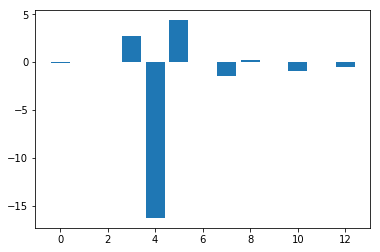

In [16]:
plt.bar(range(13), m.coef_)

<BarContainer object of 13 artists>

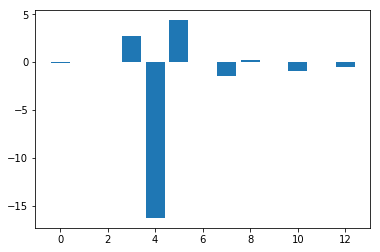

In [21]:
from sklearn.linear_model import Ridge # LinReg with an L2 penalty

m = Ridge(alpha=0.0)
m.fit(Xtrain, ytrain)
plt.bar(range(13), m.coef_)

In [22]:
m = LinearRegression()
m.fit(Xtrain, ytrain)
lincoef = m.coef_

<BarContainer object of 13 artists>

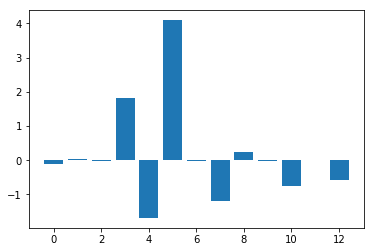

In [23]:
m = Ridge(alpha=10.0)
m.fit(Xtrain, ytrain)
plt.bar(range(13), m.coef_)

#### They look completely different now! 

<BarContainer object of 13 artists>

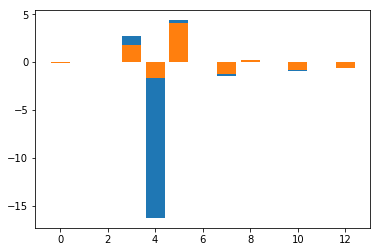

In [24]:
m = Ridge(alpha=10.0)
m.fit(Xtrain, ytrain)
plt.bar(range(13),lincoef)
plt.bar(range(13), m.coef_)

<BarContainer object of 13 artists>

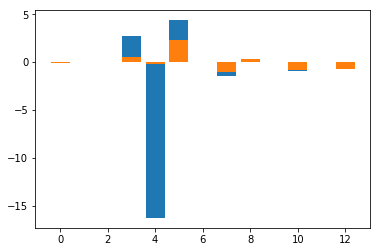

In [25]:
m = Ridge(alpha=100.0)
m.fit(Xtrain, ytrain)
plt.bar(range(13),lincoef)
plt.bar(range(13), m.coef_)

#### L2 regularisation takes away the biggest coefficients

<BarContainer object of 13 artists>

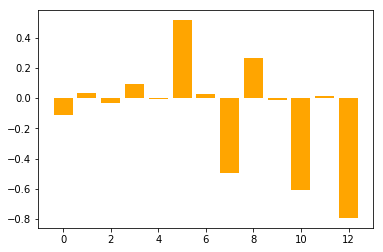

In [26]:
m = Ridge(alpha=1000.0)
m.fit(Xtrain, ytrain)
#plt.bar(range(13),lincoef)
plt.bar(range(13), m.coef_, color = 'orange')


### CAVEAT: Your data MUST BE SCALED  to use L1 or L2

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
Xscaled = MinMaxScaler().fit_transform(Xtrain)

In [29]:
m = LinearRegression()
m.fit(Xscaled, ytrain)
lincoef = m.coef_

<BarContainer object of 13 artists>

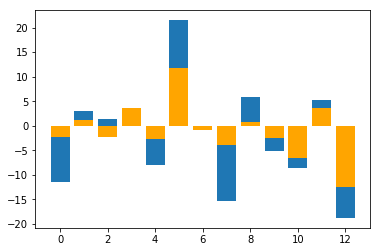

In [30]:
m = Ridge(alpha=10.0)
m.fit(Xscaled, ytrain)
plt.bar(range(13),lincoef)
plt.bar(range(13), m.coef_, color = 'orange')